In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

from evaluate_models import *
from manipulate_data import *

In [2]:
model_names = ['ARMA', 'LSTM', 'GRU', 'RF']

frequencies = ['D', '60min', '15min', '5min', 'min']
frequencies_number_of_samples = np.multiply([1, 7, 26, 78, 390], 250)

predictions, returns, dates, number_of_study_periods, study_periods = \
            append_periods(model_names, frequencies, frequencies_number_of_samples)

Frequency: D
Frequency: 60min
Frequency: 15min
Frequency: 5min
Frequency: min


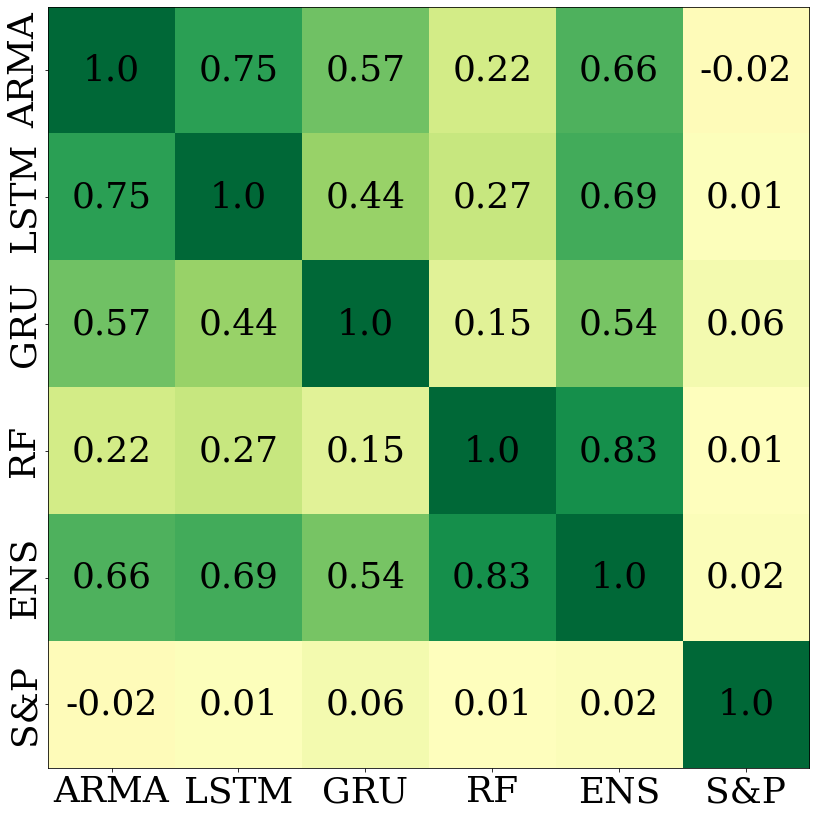

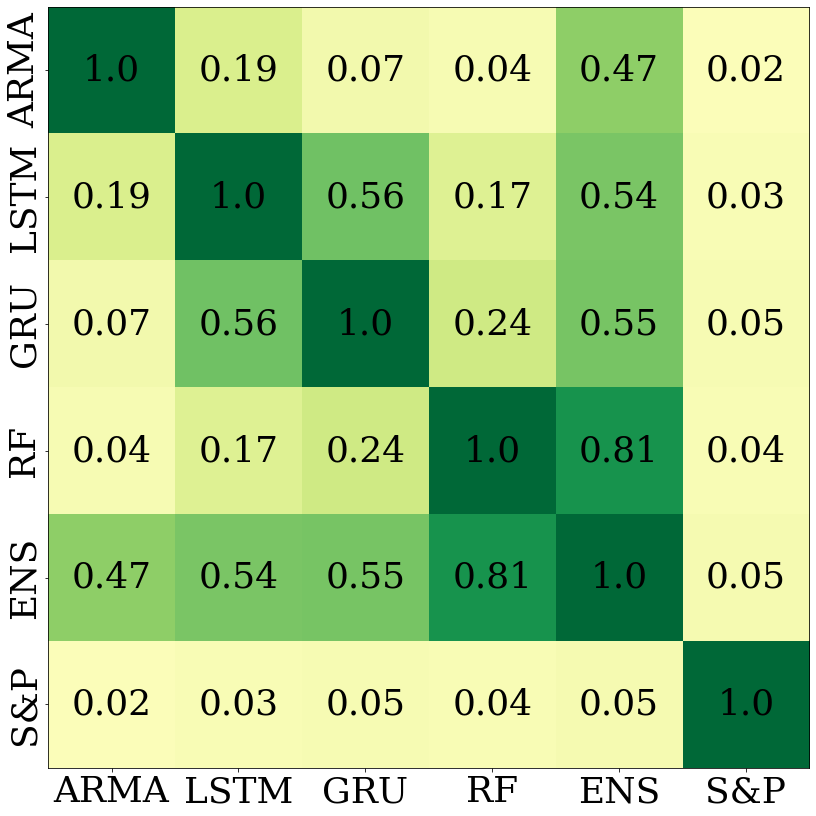

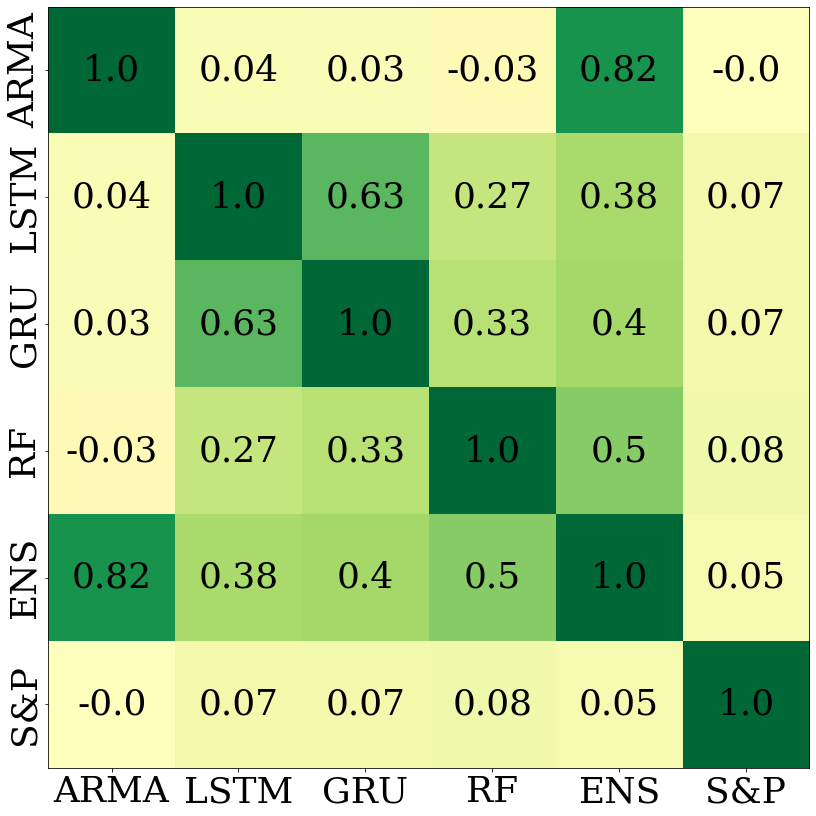

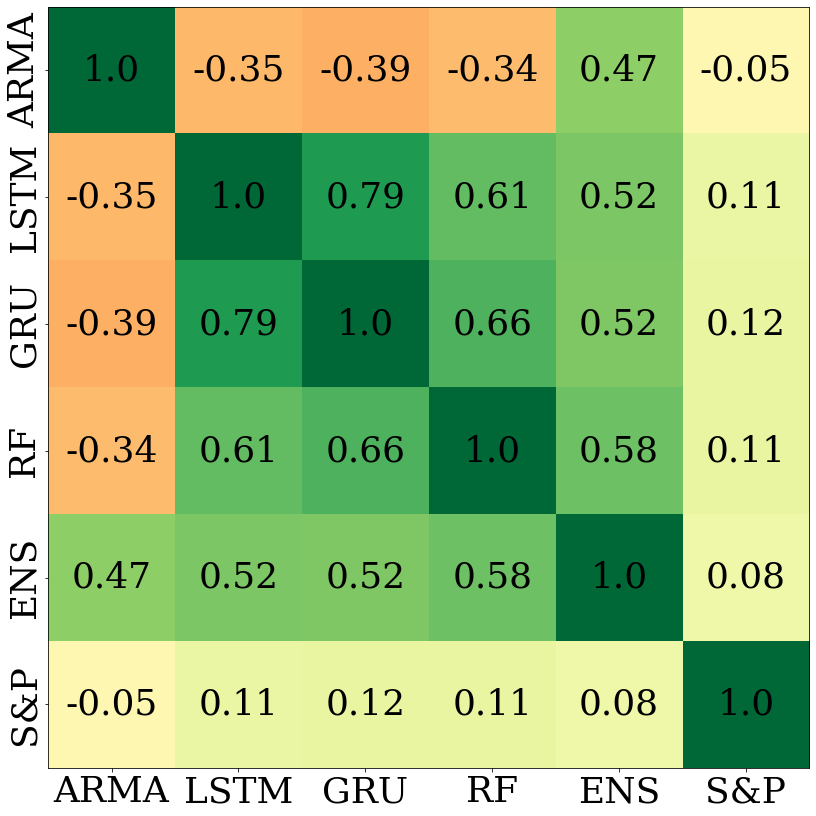

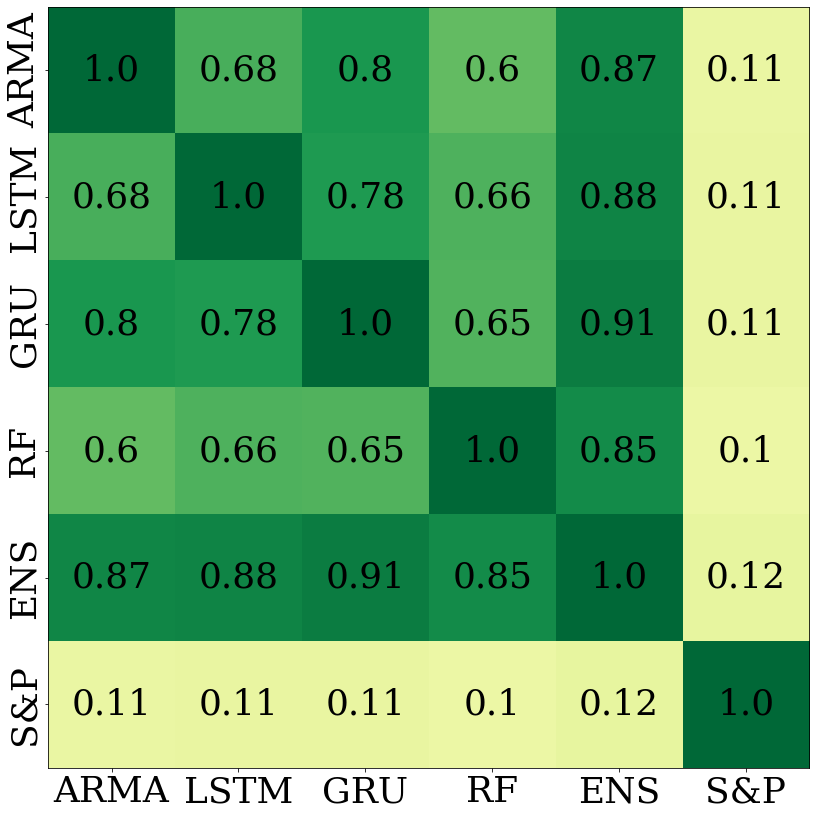

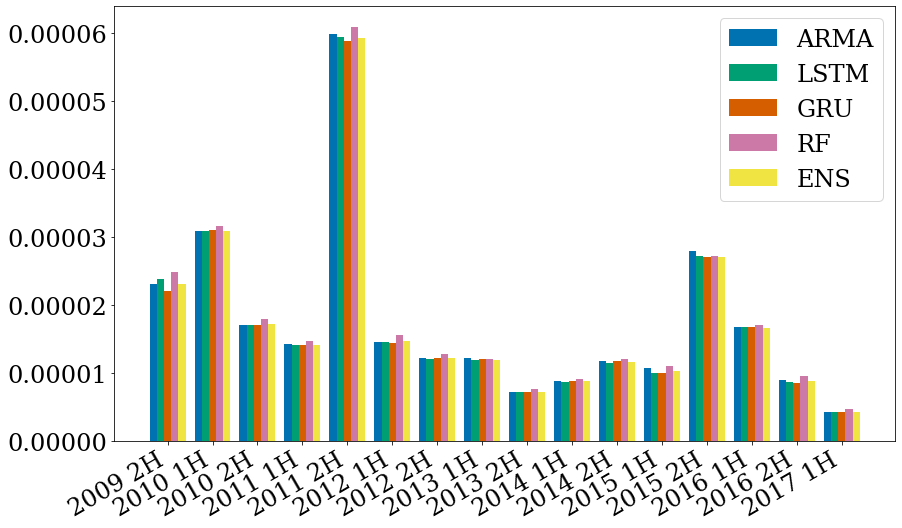

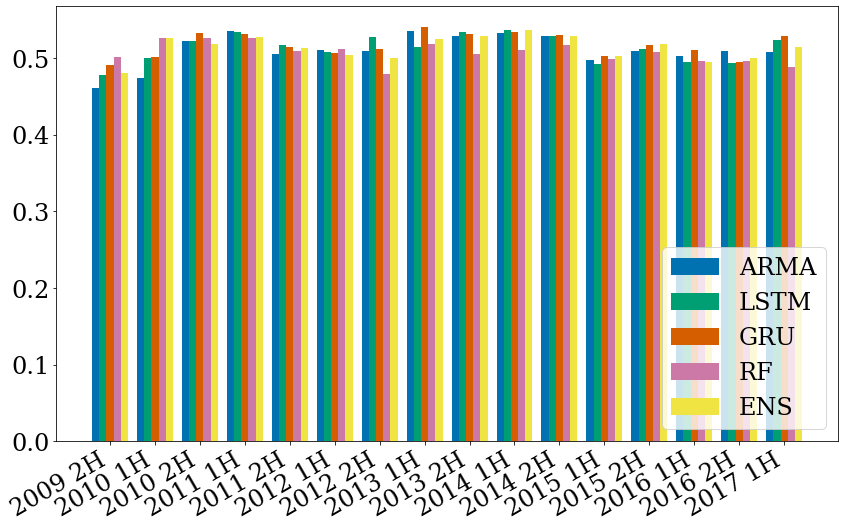

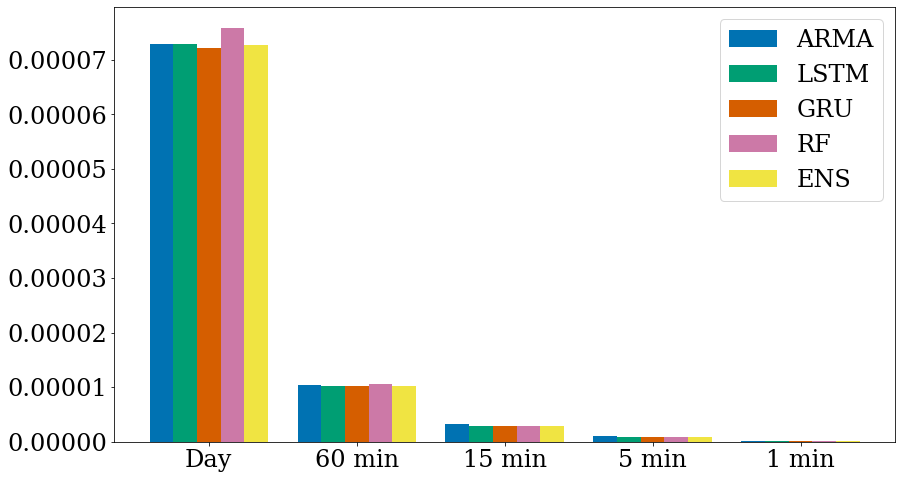

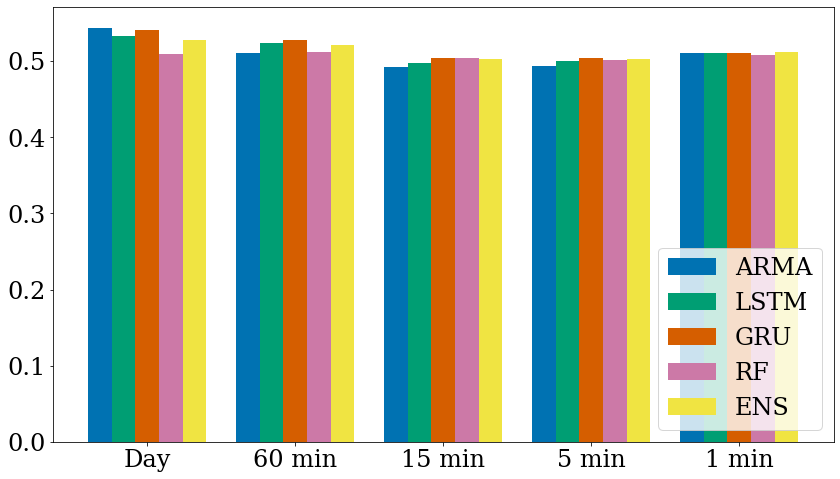

In [3]:
calculate_corr(predictions, returns, model_names)
mse, directional_accuracy = calculate_da_mse(model_names, frequencies, number_of_study_periods, study_periods)
calculate_MCS(predictions, returns, model_names)
pred_std = calculate_pred_std(predictions)

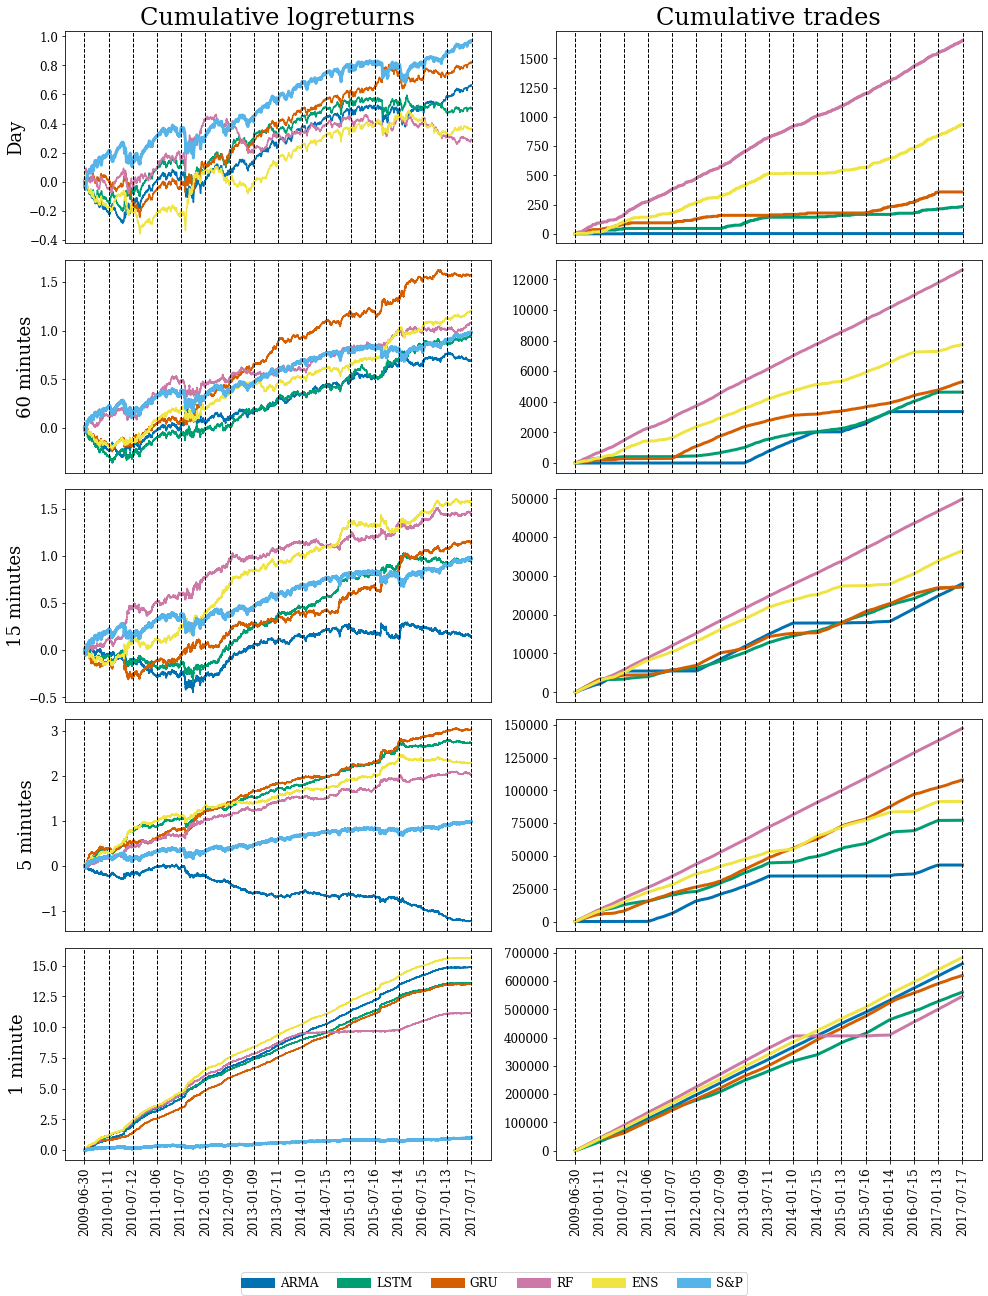

In [4]:
transaction_cost = 0
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
logr = create_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(logr, returns, trading_strategy, frequencies, dates, number_of_study_periods, transaction_cost, model_names)
sharpe_ratios = create_sharpe_ratio(logr, returns, transaction_cost, frequencies_number_of_samples, model_names)
sortino_ratios = create_sortino_ratio(logr, returns, transaction_cost, frequencies_number_of_samples, model_names)

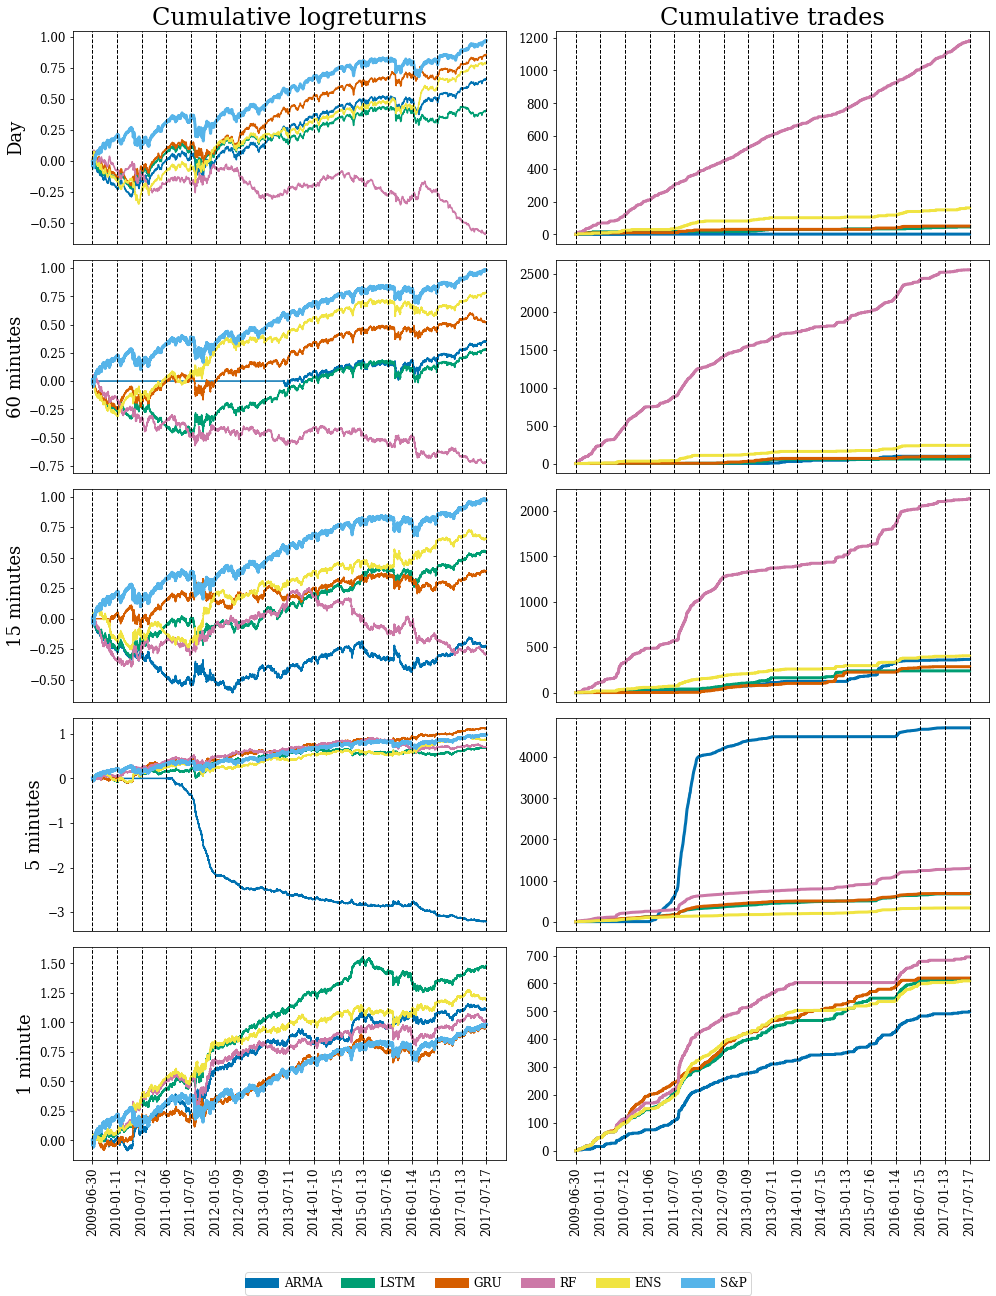

In [5]:
transaction_cost = 0.0005
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
logr = create_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(logr, returns, trading_strategy, frequencies, dates, number_of_study_periods, transaction_cost, model_names)
sharpe_ratios = create_sharpe_ratio(logr, returns, transaction_cost, frequencies_number_of_samples, model_names)
sortino_ratios = create_sortino_ratio(logr, returns, transaction_cost, frequencies_number_of_samples, model_names)